In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from hmmlearn import hmm
import sb_hmmlearn.hmm
# import time

# Generate Data
sb_hmm is designed to study. a hidden markov system with equilibrium transition matrix A0. The transition matrix is assumed to be perturbed from equilibrium by a matrix A1, and equilibriate over time such that 

$$A(t)=A_0+U_tA_1$$

The goal is to estimate $U_t$


First, use the hmmlearn package to generate synthetic data from an original transition matrix A0, and perturbed matrix (A0+A1). Have it recover in THREE distinct phases.

0.0 [1. 1. 1. 1. 1.]


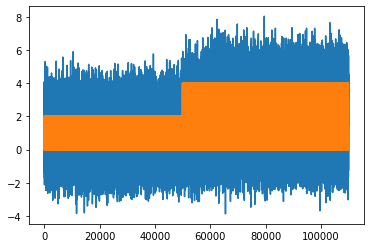

In [4]:
"""
Make reference HMM
"""

n_states = 5
d_em = 1

A0 = np.random.uniform(.1,.3,size=(n_states,n_states))+np.eye(n_states)
for i in range(n_states):
    A0[i] = A0[i]/A0[i].sum()
    
#A1 = np.random.normal(0,.1,size = A0.shape)
#for i in range(n_states):
#    A1[i] = A1[i]-A1[i].mean()
#print((A0+A1).min())
    
A1 = np.zeros(A0.shape)
mx=3
for i in range(n_states):
    A1[i,mx:] = -A0[i,mx:]
    A1[i,:mx] = np.sum(A0[i,mx:])/mx
print((A0+A1).min(),(A0+A1).sum(axis=1))
    
#A1 = np.zeros(A0.shape)
#for i in range(n_states):
#    z = np.random.choice(n_states,3,replace=False)
#    for q in z:
##        q = np.random.randint(0,n_states)
#        A1[i] +=A0[i,q]/(n_states-1)
#        A1[i,q] -= A0[i,q]
#print((A0+A1).min())

covars = [np.eye(d_em) for i in range(n_states)]
means = np.arange(n_states)
startprob = np.ones(n_states)/n_states

# In[]
"""
Generate sampled trajectories
"""
hmm1 = hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 params="", init_params="",)

hmm1.transmat_ = A0+A1
hmm1.startprob_ = startprob
hmm1.means_ = means[:,None]
hmm1.covars_ =covars

hmm2 = hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 params="", init_params="",)

hmm2.transmat_ = A0+.5*A1
hmm2.startprob_ = startprob
hmm2.means_ = means[:,None]
hmm2.covars_ =covars


hmm3 = hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 params="", init_params="",)

hmm3.transmat_ = A0+0*A1
hmm3.startprob_ = startprob
hmm3.means_ = means[:,None]
hmm3.covars_ =covars

b_true = np.array([5000,1000,5000])*10
x1,z1 = hmm1.sample(b_true[0])
x2,z2 = hmm2.sample(b_true[1])
x3,z3 = hmm3.sample(b_true[2])

x = np.append(x1,x2)
x = np.append(x,x3)
z = np.append(z1,z2)
z = np.append(z,z3)
plt.plot(x)
plt.plot(z)


# Fit the response
Now, use sb_hmmlearn fit() function to estimate $U_t$ in this sysnthetic data

In [6]:
a_0=1000 /(120*60*24)
b_0=2000/(120*60*24)
grad_iter = 5
grad_conv = 1
grad_lr = np.logspace(-2,-8,7)
t0 = 0*24*60*120
n_iter=100
method = 'scipy'
method = 'grad_ascent_linesearch'
new_hmm = sb_hmmlearn.hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 n_iter=n_iter, tol=10**-4, verbose=False,
                 params="", init_params="",
                  A1 = A1, 
                  a = a_0,
                  b = b_0,
                  grad_iter = grad_iter,
                  grad_conv = grad_conv,
                  grad_lr = grad_lr,
                  t0 = t0,
                  transmat_ = A0,
                  startprob_ = startprob,
                  means_ =means[:,None], #for subclass
                  covars_ = covars,
                  )

new_hmm.grad_method = method

new_hmm.fit(x[:,None])
a_fit = new_hmm.a
b_fit = new_hmm.b

E iteration:  0
trans:  0.007604829381907992
log_trans:  -0.33937360028286434
trans:  0.007604829381907992
log_trans:  -0.33937360028286434
fwd:  [-20.66696676 -18.26017036 -17.72086736 -21.13070286 -22.31186365]
bwd:  [-202468.49776124 -202467.95024786 -202468.654428   -202468.40534293
 -202468.40524229]
grad:  41551.816960289376 45789.745668344614
a:  0.012507101301987386
b:  0.018979527218543853
grad:  42441.488815283825 39806.935544894186
a:  0.019800926257138224
b:  0.025820588358719324
grad:  43528.628955548 36802.10629937839
a:  0.02743736733682508
b:  0.032276962545247784
grad:  44432.918198125466 35119.550641986956
a:  0.035282678893318556
b:  0.0384778565599484
grad:  44996.08529360892 34066.1939171642
a:  0.04325545492647946
b:  0.044513984650459325
E iteration:  1
trans:  0.01679525845765186
log_trans:  -0.35065010060060836
trans:  0.01679525845765186
log_trans:  -0.35065010060060836
fwd:  [-20.96144301 -18.55519488 -18.03206884 -20.53381446 -21.78527804]
bwd:  [-200760.173

a:  0.04119979945334682
b:  0.34304719251378
grad:  2800.201664718296 -2059.3663374136895
a:  0.042005396292718156
b:  0.342454728394702
grad:  698.0464552360082 -971.6517435670921
a:  0.04258885142698696
b:  0.3416425830220652
E iteration:  11
trans:  2.0931607409541142e-05
log_trans:  -0.3301631027647445
trans:  2.0931607409541142e-05
log_trans:  -0.3301631027647445
fwd:  [-20.4317162  -18.02521503 -17.47360373 -26.8853219  -28.00759451]
bwd:  [-195621.41586741 -195620.91456321 -195621.57333188 -195621.28567398
 -195621.27481947]
grad:  -9792.023466486593 2079.2047156786334
a:  0.04161066008509116
b:  0.3418502888203475
grad:  -8062.239688619867 1422.764931672958
a:  0.0406258768764526
b:  0.3420240761385947
grad:  -6205.808584848491 758.7659121811671
a:  0.0396332687179993
b:  0.34214543941051806
grad:  -4218.1537770060695 105.83596602452857
a:  0.038633583338305695
b:  0.3421705221062835
grad:  -2114.329663696668 -485.75579663234373
a:  0.037658973803605285
b:  0.34194661084066463


grad:  -330.35591307145575 46.96432404046505
a:  0.026181737323278814
b:  0.3394822796983201
grad:  21.173000307729115 -62.84654478425754
a:  0.026184930004624258
b:  0.339472803054092
grad:  1.8241110675549201 -44.50772763268437
a:  0.02618533950228053
b:  0.3394628114420264
grad:  -8.382420370278268 -27.781297476688728
a:  0.02618245084173683
b:  0.3394532377468013
grad:  -6.86082172029934 -14.643289552741294
a:  0.02617820813570044
b:  0.33944418239228097
E iteration:  22
trans:  1.4908995724094432e-07
log_trans:  -0.3301379789941752
trans:  1.4908995724094432e-07
log_trans:  -0.3301379789941752
fwd:  [-20.43108553 -18.02458576 -17.47294237 -31.82853951 -32.95065141]
bwd:  [-195388.56503787 -195388.06385226 -195388.72250362 -195388.43474675
 -195388.42386519]
grad:  -223.186463596531 37.53949388868787
a:  0.026079593339545442
b:  0.33946076919363954
grad:  131.49529584953507 -76.60043872390449
a:  0.026088234134316848
b:  0.3394557356396547
grad:  97.0810261653467 -60.67050621125529

trans:  1.3503757813337902e-07
log_trans:  -0.3301379620066129
fwd:  [-20.4310851  -18.02458533 -17.47294192 -31.92751896 -33.04963076]
bwd:  [-195386.83039181 -195386.32920627 -195386.98785756 -195386.70010062
 -195386.68921905]
grad:  -4.419326619280515 0.498181190421
a:  0.025976884091304518
b:  0.33941840869933854
grad:  -0.8688610327415134 -0.567324979190981
a:  0.02597680036008638
b:  0.33941835402683074
grad:  -0.6264964959226536 -0.5513226929437899
a:  0.02597672528907797
b:  0.33941828796365114
grad:  -0.42430501893944594 -0.5088495288917572
a:  0.025976661247147755
b:  0.3394182111611045
grad:  -0.26993791727454397 -0.43888046706708395
a:  0.02597660885744821
b:  0.3394181259829419
E iteration:  33
trans:  1.3495230499760424e-07
log_trans:  -0.33013796190352834
trans:  1.3495230499760424e-07
log_trans:  -0.33013796190352834
fwd:  [-20.4310851  -18.02458533 -17.47294192 -31.92815053 -33.05026232]
bwd:  [-195386.81941618 -195386.31823065 -195386.97688193 -195386.68912499
 -1953

a:  0.025973838499179395
b:  0.33941748326491683
grad:  0.008547344063852158 -0.006516778093770793
not updated
E iteration:  43
trans:  1.3476769544773504e-07
log_trans:  -0.3301379616803586
trans:  1.3476769544773504e-07
log_trans:  -0.3301379616803586
fwd:  [-20.43108509 -18.02458532 -17.47294191 -31.92951918 -33.05163098]
bwd:  [-195386.7906443  -195386.28945877 -195386.94811005 -195386.66035311
 -195386.64947154]
grad:  -0.052287902071875614 0.005086518170805906
a:  0.02597382854616228
b:  0.339417484233137
grad:  -0.016855408804476113 -0.005333548555481871
a:  0.025973819012089467
b:  0.33941748121627513
grad:  0.013589468139705296 -0.008805929897922816
not updated
E iteration:  44
trans:  1.3476638481557668e-07
log_trans:  -0.33013796167877424
trans:  1.3476638481557668e-07
log_trans:  -0.33013796167877424
fwd:  [-20.43108509 -18.02458532 -17.47294191 -31.92952891 -33.0516407 ]
bwd:  [-195386.79048603 -195386.2893005  -195386.94795178 -195386.66019485
 -195386.64931327]
grad:  -0

# Plot converged results

/home/sam/anaconda3/envs/imgBehavior_shmm/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


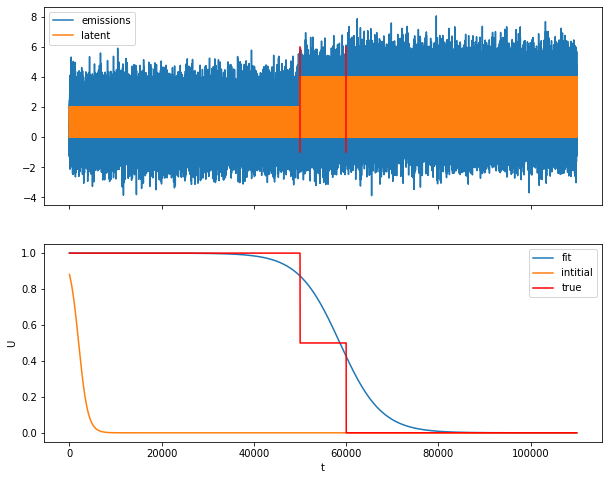

In [10]:
fig, ax = plt.subplots(nrows=2,sharex=True, figsize=(10,8))
ax[0].plot(x,label='emissions')
ax[0].plot(z, label='latent')
ax[0].plot(np.ones(2)*b_true[0],[-1,6],c='r')
ax[0].plot(np.ones(2)*(b_true[0]+b_true[1]),[-1,6],c='r')
ax[0].legend()

t=np.arange(x.size)
new_hmm.a = a_0
new_hmm.b = b_0
u_0 = new_hmm.U(t)

new_hmm.a = a_fit
new_hmm.b = b_fit
t=np.arange(x.size)
u_fit = new_hmm.U(t)

ax[1].plot(u_fit,label='fit')
ax[1].plot(u_0, label='intitial')
truth =np.zeros(x.size)
truth[:b_true[0]]=1
truth[b_true[0]:b_true[0]+b_true[1]]=.5
plt.plot(truth,c='r', label='true')
#ax[1].plot(np.ones(2)*b_0*120*60*24,[0,1],c='limegreen')
ax[1].legend()
ax[1].set_ylabel('U')
ax[1].set_xlabel('t')
fig.savefig('3phase.png')

# Generalize
Repeat with broader transitions

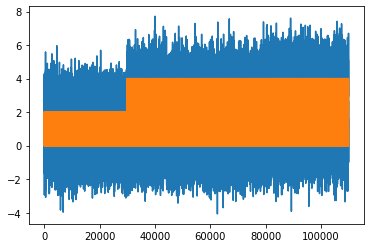

In [14]:
"""
Generate sampled trajectories
"""
hmm1 = hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 params="", init_params="",)

hmm1.transmat_ = A0+A1
hmm1.startprob_ = startprob
hmm1.means_ = means[:,None]
hmm1.covars_ =covars

hmm2 = hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 params="", init_params="",)

hmm2.transmat_ = A0+.5*A1
hmm2.startprob_ = startprob
hmm2.means_ = means[:,None]
hmm2.covars_ =covars


hmm3 = hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 params="", init_params="",)

hmm3.transmat_ = A0+0*A1
hmm3.startprob_ = startprob
hmm3.means_ = means[:,None]
hmm3.covars_ =covars

b_true = np.array([3000,5000,3000])*10
x1,z1 = hmm1.sample(b_true[0])
x2,z2 = hmm2.sample(b_true[1])
x3,z3 = hmm3.sample(b_true[2])

x = np.append(x1,x2)
x = np.append(x,x3)
z = np.append(z1,z2)
z = np.append(z,z3)
plt.plot(x)
plt.plot(z)

In [15]:
a_0=1000 /(120*60*24)
b_0=2000/(120*60*24)
grad_iter = 5
grad_conv = 1
grad_lr = np.logspace(-2,-8,7)
t0 = 0*24*60*120
n_iter=100
method = 'scipy'
method = 'grad_ascent_linesearch'
new_hmm = sb_hmmlearn.hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 n_iter=n_iter, tol=10**-4, verbose=False,
                 params="", init_params="",
                  A1 = A1, 
                  a = a_0,
                  b = b_0,
                  grad_iter = grad_iter,
                  grad_conv = grad_conv,
                  grad_lr = grad_lr,
                  t0 = t0,
                  transmat_ = A0,
                  startprob_ = startprob,
                  means_ =means[:,None], #for subclass
                  covars_ = covars,
                  )

new_hmm.grad_method = method

new_hmm.fit(x[:,None])
a_fit = new_hmm.a
b_fit = new_hmm.b

E iteration:  0
trans:  0.007604829381907992
log_trans:  -0.33937360028286434
trans:  0.007604829381907992
log_trans:  -0.33937360028286434
fwd:  [-17.40989477 -18.19586469 -20.41827746 -25.36819217 -28.9795695 ]
bwd:  [-203554.47152112 -203553.82140758 -203553.57865499 -203553.84103516
 -203553.93971633]
grad:  40890.16756808402 45405.939950308326
a:  0.012478928350909815
b:  0.01900499532539373
grad:  41215.20567840179 38354.49377692323
a:  0.0197994875277333
b:  0.025817440799570053
grad:  43169.4067517939 35359.539537273544
a:  0.027535623924483586
b:  0.03215401666125399
grad:  44168.25364679623 33897.816869318514
a:  0.035468608739584684
b:  0.03824234581820464
grad:  44203.37719643451 32890.99275810646
a:  0.04349133590537788
b:  0.0442119227565851
E iteration:  1
trans:  0.016950720519119784
log_trans:  -0.350841947856355
trans:  0.016950720519119784
log_trans:  -0.350841947856355
fwd:  [-17.65171656 -18.45845681 -20.71253556 -24.79396934 -28.40729592]
bwd:  [-201885.76912512 -

/home/sam/anaconda3/envs/imgBehavior_shmm/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/sam/anaconda3/envs/imgBehavior_shmm/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/sam/anaconda3/envs/imgBehavior_shmm/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


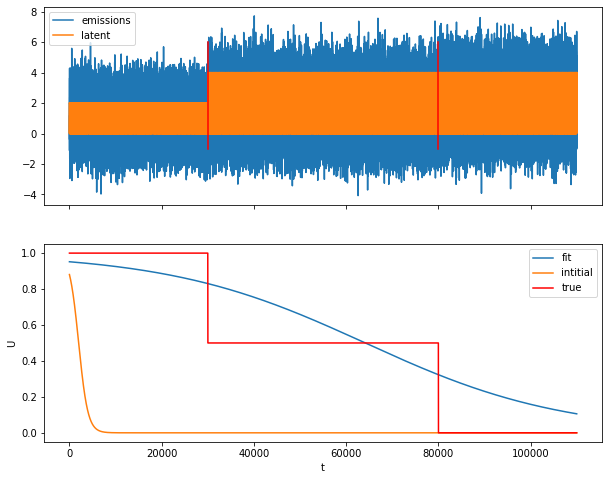

In [16]:
fig, ax = plt.subplots(nrows=2,sharex=True, figsize=(10,8))
ax[0].plot(x,label='emissions')
ax[0].plot(z, label='latent')
ax[0].plot(np.ones(2)*b_true[0],[-1,6],c='r')
ax[0].plot(np.ones(2)*(b_true[0]+b_true[1]),[-1,6],c='r')
ax[0].legend()

t=np.arange(x.size)
new_hmm.a = a_0
new_hmm.b = b_0
u_0 = new_hmm.U(t)

new_hmm.a = a_fit
new_hmm.b = b_fit
t=np.arange(x.size)
u_fit = new_hmm.U(t)

ax[1].plot(u_fit,label='fit')
ax[1].plot(u_0, label='intitial')
truth =np.zeros(x.size)
truth[:b_true[0]]=1
truth[b_true[0]:b_true[0]+b_true[1]]=.5
plt.plot(truth,c='r', label='true')
#ax[1].plot(np.ones(2)*b_0*120*60*24,[0,1],c='limegreen')
ax[1].legend()
ax[1].set_ylabel('U')
ax[1].set_xlabel('t')
fig.savefig('3phase_broad.png')